# aws_cloud

## 데이터 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cloud = pd.read_csv('../data/weather/raw/aws_cloud.csv')
cloud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         139818 non-null  int64  
 1   tma                139818 non-null  object 
 2   stn_id             139818 non-null  int64  
 3   avg_tca            84257 non-null   float64
 4   avg_tca_qcflg      0 non-null       float64
 5   avg_tca_crob       0 non-null       float64
 6   avg_tca_calc_dtnb  139818 non-null  int64  
 7   avg_tca_srv_yn     0 non-null       float64
 8   orgn_stn_id        0 non-null       float64
dtypes: float64(5), int64(3), object(1)
memory usage: 9.6+ MB


In [3]:
cloud.head()

,Unnamed: 0,tma,stn_id,avg_tca,avg_tca_qcflg,avg_tca_crob,avg_tca_calc_dtnb,avg_tca_srv_yn,orgn_stn_id
0,1,2016-04-01 20:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
1,2,2016-04-02 14:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
2,3,2016-04-03 08:00:00.0,637,0.0,NaN,NaN,70,NaN,NaN
3,4,2016-04-04 00:00:00.0,616,0.0,NaN,NaN,70,NaN,NaN
4,5,2016-04-04 23:00:00.0,515,0.0,NaN,NaN,70,NaN,NaN


In [4]:
cloud.isnull().sum()

Unnamed: 0                0
tma                       0
stn_id                    0
avg_tca               55561
avg_tca_qcflg        139818
avg_tca_crob         139818
avg_tca_calc_dtnb         0
avg_tca_srv_yn       139818
orgn_stn_id          139818
dtype: int64

## 컬럼 정리

In [5]:
cloud = cloud.drop(columns=['Unnamed: 0', 'avg_tca_qcflg', 'avg_tca_crob', 'avg_tca_srv_yn', 'orgn_stn_id'])
cloud.columns

Index(['tma', 'stn_id', 'avg_tca', 'avg_tca_calc_dtnb'], dtype='object')

In [6]:
cloud.head()

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
0,2016-04-01 20:00:00.0,637,0.0,70
1,2016-04-02 14:00:00.0,637,0.0,70
2,2016-04-03 08:00:00.0,637,0.0,70
3,2016-04-04 00:00:00.0,616,0.0,70
4,2016-04-04 23:00:00.0,515,0.0,70


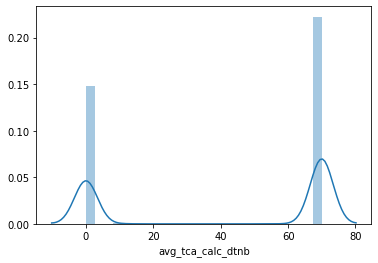

In [7]:
sns.distplot(cloud.avg_tca_calc_dtnb)

In [8]:
cloud[cloud.avg_tca_calc_dtnb == 0]

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
47,2016-04-30 18:00:00.0,616,NaN,0
97,2016-06-03 13:00:00.0,616,NaN,0
212,2016-08-24 18:00:00.0,616,NaN,0
218,2016-08-29 12:00:00.0,616,NaN,0
239,2016-09-09 18:00:00.0,616,NaN,0
...,...,...,...,...
139813,2020-03-30 01:00:00.0,637,NaN,0
139814,2020-03-30 08:00:00.0,515,NaN,0
139815,2020-03-30 16:00:00.0,634,NaN,0
139816,2020-03-30 20:00:00.0,634,NaN,0


## 데이터타입 정리

In [9]:
cloud['tma'] = pd.to_datetime(cloud['tma'])
cloud.dtypes

tma                  datetime64[ns]
stn_id                        int64
avg_tca                     float64
avg_tca_calc_dtnb             int64
dtype: object

## 정렬

### 정렬 함수 만들기

In [10]:
def sort_by(data, colname):
    data = data.sort_values(by=colname)
    data = data.reset_index()
    del data['index']
    
    return data

In [11]:
cloud = sort_by(cloud, ['tma', 'stn_id'])
cloud.head()

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
0,2016-04-01 00:00:00,515,0.0,70
1,2016-04-01 00:00:00,616,NaN,0
2,2016-04-01 00:00:00,634,0.0,70
3,2016-04-01 00:00:00,637,0.0,70
4,2016-04-01 01:00:00,515,0.0,70


## 결측치 & 이상치 처리

In [12]:
cloud.tail()

,tma,stn_id,avg_tca,avg_tca_calc_dtnb
139813,2020-03-31 22:00:00,637,NaN,0
139814,2020-03-31 23:00:00,515,NaN,0
139815,2020-03-31 23:00:00,616,NaN,0
139816,2020-03-31 23:00:00,634,NaN,0
139817,2020-03-31 23:00:00,637,NaN,0


In [13]:
cloud.avg_tca.value_counts().sort_values()

 2.6         1
 2.4         1
 2.8         1
-59.4        1
 3.1         1
 3.2         1
 2.9         1
 3.3         1
 2.2         1
 3.8         2
 2.1         3
 1.6         4
 1.8         4
 0.9         5
 0.8         5
 0.4         5
 2.3         5
 2.0         5
 1.9         6
 0.5         6
 1.2         6
 1.0         6
 1.7         7
 1.3         7
 1.5         8
 1.4        11
 1.1        13
 0.7        14
 0.3        14
 0.6        17
 0.1        17
 0.2        22
 0.0     84056
Name: avg_tca, dtype: int64

-59.4 이상치: 평균 전운량 평균으로 대체

In [14]:
cloud.avg_tca.mean()

0.0016995620541913428

In [15]:
cloud.loc[cloud.avg_tca==-59.4, 'avg_tca'] = cloud.avg_tca.mean()

In [16]:
cloud.avg_tca.value_counts().sort_values()

3.2000        1
0.0017        1
3.3000        1
2.9000        1
2.6000        1
2.8000        1
2.2000        1
2.4000        1
3.1000        1
3.8000        2
2.1000        3
1.6000        4
1.8000        4
0.4000        5
2.0000        5
2.3000        5
0.9000        5
0.8000        5
0.5000        6
1.9000        6
1.0000        6
1.2000        6
1.7000        7
1.3000        7
1.5000        8
1.4000       11
1.1000       13
0.7000       14
0.3000       14
0.1000       17
0.6000       17
0.2000       22
0.0000    84056
Name: avg_tca, dtype: int64

In [17]:
cloud.isnull().sum()

tma                      0
stn_id                   0
avg_tca              55561
avg_tca_calc_dtnb        0
dtype: int64

In [18]:
cloud = cloud.fillna(0)
cloud.isnull().sum()

tma                  0
stn_id               0
avg_tca              0
avg_tca_calc_dtnb    0
dtype: int64

In [19]:
cloud.to_csv('../data/weather/aws_cloud.csv', index=False, encoding='utf-8')

# aws_icsr_ss
## 데이터 확인

In [48]:
icsr = pd.read_csv('../data/weather/raw/aws_icsr_ss.csv')
icsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           139818 non-null  int64  
 1   tma                  139818 non-null  object 
 2   stn_id               139818 non-null  int64  
 3   sum_ss_hr            62332 non-null   float64
 4   sum_ss_hr_qcflg      68422 non-null   float64
 5   sum_ss_hr_crob       0 non-null       float64
 6   ssrate               0 non-null       float64
 7   sum_gsr              62333 non-null   float64
 8   sum_ss_hr_calp_dtnb  139818 non-null  int64  
 9   orgn_stn_id          0 non-null       float64
 10  sum_ss_hr_srv_yn     0 non-null       float64
dtypes: float64(7), int64(3), object(1)
memory usage: 11.7+ MB


## 컬럼 정리

In [49]:
icsr = icsr.drop(columns=['Unnamed: 0', 'sum_ss_hr_crob', 'ssrate', 'orgn_stn_id', 'sum_ss_hr_srv_yn', 'sum_ss_hr_qcflg'])
icsr.isnull().sum()

tma                        0
stn_id                     0
sum_ss_hr              77486
sum_gsr                77485
sum_ss_hr_calp_dtnb        0
dtype: int64

## 데이터타입 정리

In [50]:
icsr['tma'] = pd.to_datetime(icsr['tma'])
icsr.dtypes

tma                    datetime64[ns]
stn_id                          int64
sum_ss_hr                     float64
sum_gsr                       float64
sum_ss_hr_calp_dtnb             int64
dtype: object

## 정렬

In [51]:
icsr.head()

,tma,stn_id,sum_ss_hr,sum_gsr,sum_ss_hr_calp_dtnb
0,2016-04-01 20:00:00,634,0.0,0.0,70
1,2016-04-02 09:00:00,634,0.0,0.0,70
2,2016-04-02 20:00:00,515,0.0,0.0,70
3,2016-04-07 07:00:00,637,0.0,0.0,70
4,2016-04-07 11:00:00,616,0.0,0.0,70


In [52]:
icsr = sort_by(icsr, ['tma', 'stn_id'])
icsr.head()

,tma,stn_id,sum_ss_hr,sum_gsr,sum_ss_hr_calp_dtnb
0,2016-04-01 00:00:00,515,0.0,0.0,70
1,2016-04-01 00:00:00,616,0.0,0.0,10
2,2016-04-01 00:00:00,634,0.0,0.0,70
3,2016-04-01 00:00:00,637,0.0,0.0,70
4,2016-04-01 01:00:00,515,0.0,0.0,70


## 결측치 & 이상치 처리

In [53]:
icsr.isnull().sum()

tma                        0
stn_id                     0
sum_ss_hr              77486
sum_gsr                77485
sum_ss_hr_calp_dtnb        0
dtype: int64

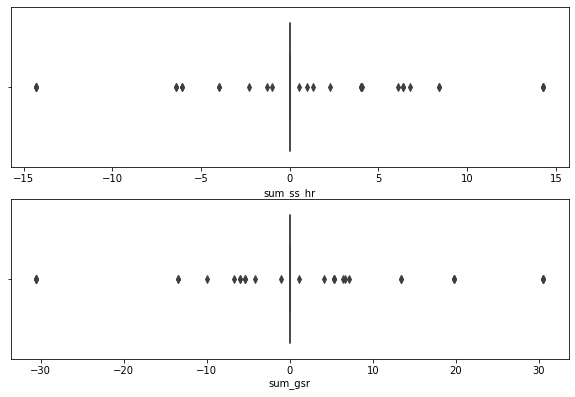

In [55]:
plt.figure(figsize=(10,10))

for i in range(2):
    plt.subplot(3, 1, i+1)
    sns.boxplot(icsr.iloc[:,i+2])

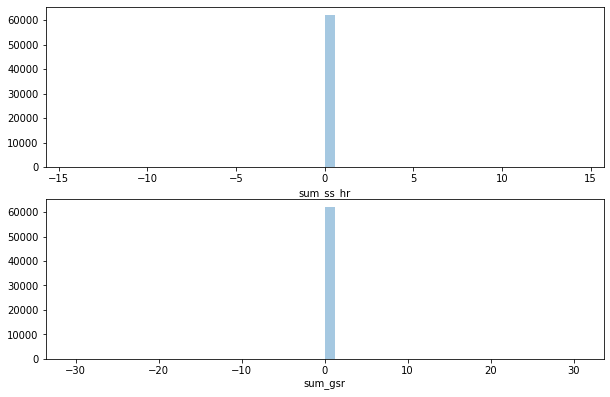

In [56]:
plt.figure(figsize=(10,10))

for i in range(2):
    plt.subplot(3, 1, i+1)
    sns.distplot(icsr.iloc[:,i+2], kde=False)

In [57]:
icsr.sum_ss_hr.value_counts()

 0.0     62301
 14.3        4
-14.3        4
 4.0         3
 8.4         2
-4.0         2
 6.4         2
-6.4         2
-6.1         2
 1.0         1
-2.3         1
 0.5         1
 6.8         1
 6.1         1
 4.1         1
-1.0         1
-1.3         1
 1.3         1
 2.3         1
Name: sum_ss_hr, dtype: int64

In [58]:
icsr['sum_ss_hr'] = icsr.sum_ss_hr.fillna(0)
icsr.isnull().sum()

tma                        0
stn_id                     0
sum_ss_hr                  0
sum_gsr                77485
sum_ss_hr_calp_dtnb        0
dtype: int64

In [60]:
icsr.sum_gsr.value_counts()

 0.00     62302
-30.56        4
 30.56        4
 5.37         3
 19.84        3
-5.37         2
-6.00         2
-13.42        2
 13.42        2
-1.10         1
-6.71         1
 7.16         1
 6.71         1
 1.10         1
 6.40         1
 4.17         1
-9.99         1
-4.17         1
Name: sum_gsr, dtype: int64

In [61]:
icsr['sum_gsr'] = icsr.sum_gsr.fillna(0)
icsr.isnull().sum()

tma                    0
stn_id                 0
sum_ss_hr              0
sum_gsr                0
sum_ss_hr_calp_dtnb    0
dtype: int64

In [65]:
icsr.to_csv('../data/weather/aws_icsr_ss.csv', encoding='utf-8', index=False)

# aws_lwt_tg

## 데이터 확인

In [66]:
lwt = pd.read_csv('../data/weather/raw/aws_lwt_tg.csv')
lwt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            139818 non-null  int64  
 1   tma                   139818 non-null  object 
 2   stn_id                139818 non-null  int64  
 3   avg_min_tg            0 non-null       float64
 4   min_tg                0 non-null       float64
 5   min_tg_hrmt           0 non-null       float64
 6   min_tg_crob           0 non-null       float64
 7   min_tg_qcflg          0 non-null       float64
 8   avg_min_tg_qcflg      0 non-null       float64
 9   avg_min_tg_crob       0 non-null       float64
 10  avg_min_tg_calc_dtnb  139818 non-null  int64  
 11  min_tg_calp_dtnb      139818 non-null  int64  
 12  avg_min_tg_srv_yn     0 non-null       float64
 13  min_tg_srv_yn         0 non-null       float64
 14  orgn_stn_id           0 non-null       float64
dtype

## 컬럼 정리

In [67]:
lwt.columns

Index(['Unnamed: 0', 'tma', 'stn_id', 'avg_min_tg', 'min_tg', 'min_tg_hrmt',
       'min_tg_crob', 'min_tg_qcflg', 'avg_min_tg_qcflg', 'avg_min_tg_crob',
       'avg_min_tg_calc_dtnb', 'min_tg_calp_dtnb', 'avg_min_tg_srv_yn',
       'min_tg_srv_yn', 'orgn_stn_id'],
      dtype='object')

In [68]:
lwt = lwt.drop(columns=['Unnamed: 0', 'avg_min_tg', 'min_tg', 'min_tg_hrmt',
       'min_tg_crob', 'min_tg_qcflg', 'avg_min_tg_qcflg', 'avg_min_tg_crob',
       'avg_min_tg_srv_yn', 'min_tg_srv_yn', 'orgn_stn_id'])
lwt.isnull().sum()

tma                     0
stn_id                  0
avg_min_tg_calc_dtnb    0
min_tg_calp_dtnb        0
dtype: int64

In [70]:
lwt.head()

,tma,stn_id,avg_min_tg_calc_dtnb,min_tg_calp_dtnb
0,2016-04-02 14:00:00.0,515,0,0
1,2016-04-03 07:00:00.0,616,0,0
2,2016-04-03 08:00:00.0,637,0,0
3,2016-04-03 17:00:00.0,634,0,0
4,2016-04-04 11:00:00.0,515,0,0


## 데이터타입 정리

In [71]:
lwt['tma'] = pd.to_datetime(lwt['tma'])
lwt.dtypes

tma                     datetime64[ns]
stn_id                           int64
avg_min_tg_calc_dtnb             int64
min_tg_calp_dtnb                 int64
dtype: object

## 정렬

In [72]:
lwt = sort_by(lwt, ['tma', 'stn_id'])
lwt.head()

,tma,stn_id,avg_min_tg_calc_dtnb,min_tg_calp_dtnb
0,2016-04-01 00:00:00,515,0,0
1,2016-04-01 00:00:00,616,0,0
2,2016-04-01 00:00:00,634,0,0
3,2016-04-01 00:00:00,637,0,0
4,2016-04-01 01:00:00,515,0,0


## 결측치 & 이상치 처리

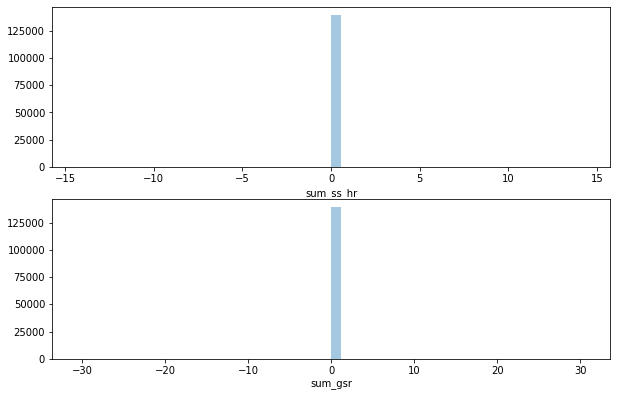

In [76]:
plt.figure(figsize=(10,10))

for i in range(2):
    plt.subplot(3, 1, i+1)
    sns.distplot(icsr.iloc[:,i+2], kde=False)

In [73]:
lwt.to_csv('../data/weather/aws_lwt_tg.csv', encoding='utf-8', index=False)

# aws_prsr
## 데이터 확인

In [116]:
prsr = pd.read_csv('../data/weather/raw/aws_prsr.csv')
prsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        139818 non-null  int64  
 1   tma               139818 non-null  object 
 2   stn_id            139818 non-null  int64  
 3   avg_pa            35124 non-null   float64
 4   avg_pa_qcflg      90034 non-null   float64
 5   avg_pa_crob       214 non-null     float64
 6   max_pa            35183 non-null   float64
 7   max_pa_qcflg      0 non-null       float64
 8   max_pa_crob       153 non-null     float64
 9   max_pa_hrmt       35336 non-null   float64
 10  min_pa            35183 non-null   float64
 11  min_pa_qcflg      0 non-null       float64
 12  min_pa_crob       153 non-null     float64
 13  min_pa_hrmt       35336 non-null   float64
 14  avg_pa_calc_dtnb  139816 non-null  float64
 15  avg_ps            35124 non-null   float64
 16  avg_ps_qcflg      90

In [117]:
prsr.columns

Index(['Unnamed: 0', 'tma', 'stn_id', 'avg_pa', 'avg_pa_qcflg', 'avg_pa_crob',
       'max_pa', 'max_pa_qcflg', 'max_pa_crob', 'max_pa_hrmt', 'min_pa',
       'min_pa_qcflg', 'min_pa_crob', 'min_pa_hrmt', 'avg_pa_calc_dtnb',
       'avg_ps', 'avg_ps_qcflg', 'avg_ps_crob', 'max_ps', 'max_ps_qcflg',
       'max_ps_crob', 'max_ps_hrmt', 'min_ps', 'min_ps_qcflg', 'min_ps_crob',
       'min_ps_hrmt', 'avg_ps_calc_dtnb', 'rtm_pa', 'rtm_pa_qcflg',
       'rtm_pa_crob', 'rtm_ps', 'rtm_ps_qcflg', 'rtm_ps_crob', 'rtm_pa_hrmt',
       'rtm_ps_hrmt', 'avg_pa_srv_yn', 'avg_ps_srv_yn', 'max_pa_srv_yn',
       'max_ps_srv_yn', 'min_pa_srv_yn', 'min_ps_srv_yn', 'orgn_stn_id',
       'pa_calp_dtnb', 'ps_calp_dtnb', 'rtm_pa_srv_yn', 'rtm_ps_srv_yn'],
      dtype='object')

## 컬럼 정리

In [118]:
prsr = prsr.drop(columns=['Unnamed: 0', 'avg_pa_qcflg', 'avg_pa_crob', 'max_pa_qcflg', 'max_pa_crob', 'min_pa_qcflg', 'min_pa_crob',
                         'avg_ps_qcflg', 'avg_ps_crob', 'max_ps_qcflg', 'max_ps_crob', 'min_ps_qcflg', 'min_ps_crob', 'rtm_pa_qcflg',
                         'rtm_pa_crob', 'rtm_ps_qcflg', 'rtm_ps_crob', 'avg_pa_srv_yn', 'avg_ps_srv_yn', 'max_pa_srv_yn',
                         'max_ps_srv_yn', 'min_pa_srv_yn', 'min_ps_srv_yn', 'orgn_stn_id', 'rtm_pa_srv_yn', 'rtm_ps_srv_yn'])
prsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tma               139818 non-null  object 
 1   stn_id            139818 non-null  int64  
 2   avg_pa            35124 non-null   float64
 3   max_pa            35183 non-null   float64
 4   max_pa_hrmt       35336 non-null   float64
 5   min_pa            35183 non-null   float64
 6   min_pa_hrmt       35336 non-null   float64
 7   avg_pa_calc_dtnb  139816 non-null  float64
 8   avg_ps            35124 non-null   float64
 9   max_ps            35183 non-null   float64
 10  max_ps_hrmt       35336 non-null   float64
 11  min_ps            35183 non-null   float64
 12  min_ps_hrmt       35336 non-null   float64
 13  avg_ps_calc_dtnb  139816 non-null  float64
 14  rtm_pa            35238 non-null   float64
 15  rtm_ps            35238 non-null   float64
 16  rtm_pa_hrmt       35

In [119]:
prsr.head()

,tma,stn_id,avg_pa,max_pa,max_pa_hrmt,min_pa,min_pa_hrmt,avg_pa_calc_dtnb,avg_ps,max_ps,max_ps_hrmt,min_ps,min_ps_hrmt,avg_ps_calc_dtnb,rtm_pa,rtm_ps,rtm_pa_hrmt,rtm_ps_hrmt,pa_calp_dtnb,ps_calp_dtnb
0,2016-04-01 13:00:00.0,515,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
1,2016-04-01 14:00:00.0,616,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2,2016-04-01 17:00:00.0,515,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
3,2016-04-01 18:00:00.0,616,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
4,2016-04-04 13:00:00.0,637,1010.9,1011.2,1201.0,1010.5,1254.0,60.0,1013.5,1013.8,1201.0,1013.1,1254.0,60.0,1010.5,1013.1,1300.0,1300.0,60.0,60.0


## 데이터타입 정리

In [120]:
prsr['tma'] = pd.to_datetime(prsr['tma'])
prsr.dtypes

tma                 datetime64[ns]
stn_id                       int64
avg_pa                     float64
max_pa                     float64
max_pa_hrmt                float64
min_pa                     float64
min_pa_hrmt                float64
avg_pa_calc_dtnb           float64
avg_ps                     float64
max_ps                     float64
max_ps_hrmt                float64
min_ps                     float64
min_ps_hrmt                float64
avg_ps_calc_dtnb           float64
rtm_pa                     float64
rtm_ps                     float64
rtm_pa_hrmt                float64
rtm_ps_hrmt                float64
pa_calp_dtnb               float64
ps_calp_dtnb               float64
dtype: object

## 정렬

In [135]:
prsr = sort_by(prsr, ['tma', 'stn_id'])
prsr.head()

,tma,stn_id,avg_pa,max_pa,max_pa_hrmt,min_pa,min_pa_hrmt,avg_pa_calc_dtnb,avg_ps,max_ps,max_ps_hrmt,min_ps,min_ps_hrmt,avg_ps_calc_dtnb,rtm_pa,rtm_ps,rtm_pa_hrmt,rtm_ps_hrmt,pa_calp_dtnb,ps_calp_dtnb
0,2016-04-01 00:00:00,515,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
1,2016-04-01 00:00:00,616,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2,2016-04-01 00:00:00,634,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0
3,2016-04-01 00:00:00,637,1013.3,1013.5,2301.0,1013.0,2358.0,60.0,1016.0,1016.2,2301.0,1015.7,2358.0,60.0,1013.0,1015.7,0.0,0.0,60.0,60.0
4,2016-04-01 01:00:00,515,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0


## 결측치 & 이상치 처리

In [136]:
prsr.shape

(139818, 20)

In [137]:
# plt.figure(figsize=(15,20))

# for i in range(18):
#     plt.subplot(5, 4, i+1)
#     sns.distplot(prsr.iloc[:,i+2], kde=False)

In [138]:
prsr.isnull().mean()

tma                 0.000000
stn_id              0.000000
avg_pa              0.748788
max_pa              0.748366
max_pa_hrmt         0.747271
min_pa              0.748366
min_pa_hrmt         0.747271
avg_pa_calc_dtnb    0.000014
avg_ps              0.748788
max_ps              0.748366
max_ps_hrmt         0.747271
min_ps              0.748366
min_ps_hrmt         0.747271
avg_ps_calc_dtnb    0.000014
rtm_pa              0.747972
rtm_ps              0.747972
rtm_pa_hrmt         0.747972
rtm_ps_hrmt         0.747972
pa_calp_dtnb        0.000014
ps_calp_dtnb        0.000014
dtype: float64

결측치가 75%가량. 지점별로 차이가 있는지 확인

In [139]:
prsr.groupby(by='stn_id').count()

,tma,avg_pa,max_pa,max_pa_hrmt,min_pa,min_pa_hrmt,avg_pa_calc_dtnb,avg_ps,max_ps,max_ps_hrmt,min_ps,min_ps_hrmt,avg_ps_calc_dtnb,rtm_pa,rtm_ps,rtm_pa_hrmt,rtm_ps_hrmt,pa_calp_dtnb,ps_calp_dtnb
stn_id,,,,,,,,,,,,,,,,,,,
515,35017,75,93,177,93,177,35016,75,93,177,93,177,35016,111,111,111,111,35016,35016
616,34907,55,98,117,98,117,34907,55,98,117,98,117,34907,105,105,105,105,34907,34907
634,34896,35,35,45,35,45,34896,35,35,45,35,45,34896,39,39,39,39,34896,34896
637,34998,34959,34957,34997,34957,34997,34997,34959,34957,34997,34957,34997,34997,34983,34983,34983,34983,34997,34997


637번 관측소(신평 AWS)만 가져오기

In [140]:
prsr_637 = prsr[prsr['stn_id']==637]
prsr_637.isnull().sum()

tma                  0
stn_id               0
avg_pa              39
max_pa              41
max_pa_hrmt          1
min_pa              41
min_pa_hrmt          1
avg_pa_calc_dtnb     1
avg_ps              39
max_ps              41
max_ps_hrmt          1
min_ps              41
min_ps_hrmt          1
avg_ps_calc_dtnb     1
rtm_pa              15
rtm_ps              15
rtm_pa_hrmt         15
rtm_ps_hrmt         15
pa_calp_dtnb         1
ps_calp_dtnb         1
dtype: int64

In [141]:
prsr_637.shape

(34998, 20)

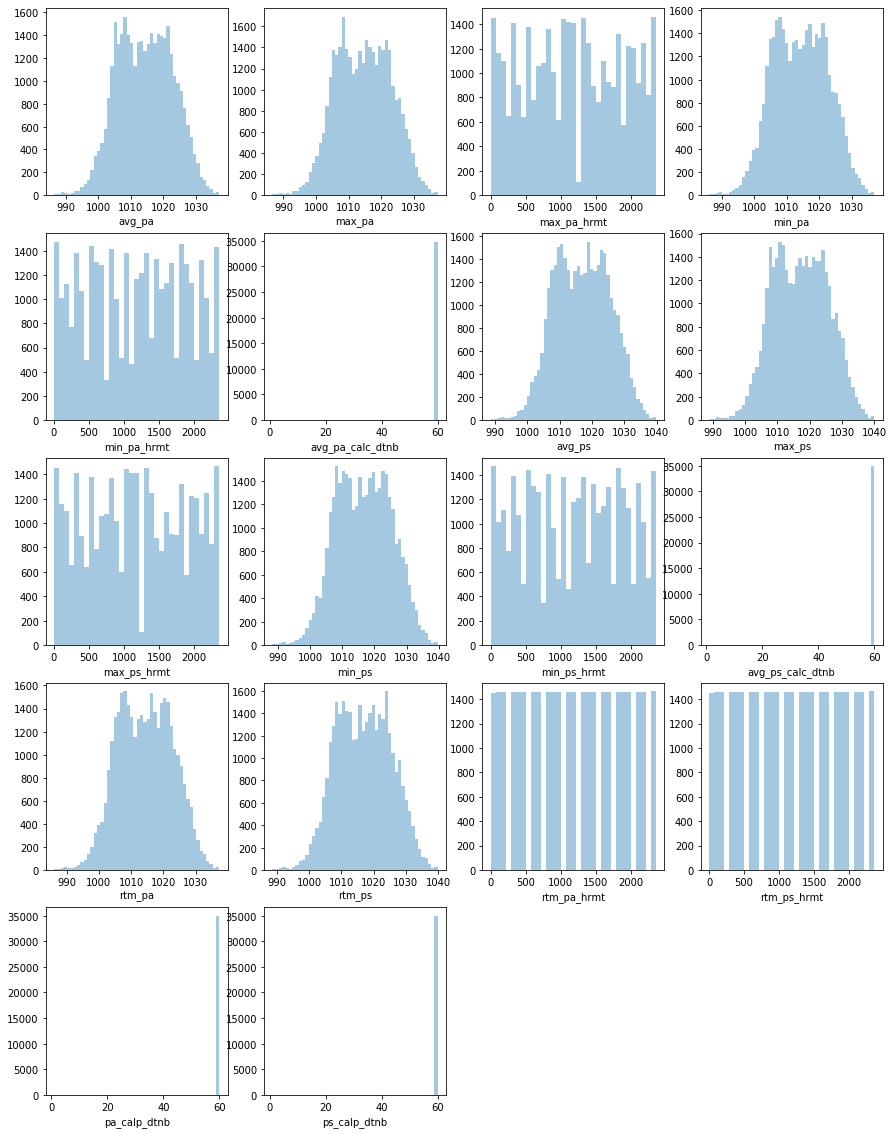

In [142]:
plt.figure(figsize=(15,20))

for i in range(18):
    plt.subplot(5, 4, i+1)
    sns.distplot(prsr_637.iloc[:,i+2], kde=False)

In [143]:
for i in range(18):
    prsr_637.iloc[:,i+2] = prsr_637.iloc[:,i+2].fillna(prsr_637.iloc[:,i+2].mean())
prsr_637.isnull().sum()

C:\Users\B0113\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


tma                 0
stn_id              0
avg_pa              0
max_pa              0
max_pa_hrmt         0
min_pa              0
min_pa_hrmt         0
avg_pa_calc_dtnb    0
avg_ps              0
max_ps              0
max_ps_hrmt         0
min_ps              0
min_ps_hrmt         0
avg_ps_calc_dtnb    0
rtm_pa              0
rtm_ps              0
rtm_pa_hrmt         0
rtm_ps_hrmt         0
pa_calp_dtnb        0
ps_calp_dtnb        0
dtype: int64

In [144]:
prsr_637.head()

,tma,stn_id,avg_pa,max_pa,max_pa_hrmt,min_pa,min_pa_hrmt,avg_pa_calc_dtnb,avg_ps,max_ps,max_ps_hrmt,min_ps,min_ps_hrmt,avg_ps_calc_dtnb,rtm_pa,rtm_ps,rtm_pa_hrmt,rtm_ps_hrmt,pa_calp_dtnb,ps_calp_dtnb
3,2016-04-01 00:00:00,637,1013.3,1013.5,2301.0,1013.0,2358.0,60.0,1016.0,1016.2,2301.0,1015.7,2358.0,60.0,1013.0,1015.7,0.0,0.0,60.0,60.0
7,2016-04-01 01:00:00,637,1012.8,1013.0,1.0,1012.6,40.0,60.0,1015.5,1015.7,1.0,1015.3,40.0,60.0,1012.6,1015.3,100.0,100.0,60.0,60.0
11,2016-04-01 02:00:00,637,1012.5,1012.6,101.0,1012.2,155.0,60.0,1015.2,1015.3,101.0,1014.9,155.0,60.0,1012.2,1014.9,200.0,200.0,60.0,60.0
15,2016-04-01 03:00:00,637,1012.2,1012.3,203.0,1012.1,217.0,60.0,1014.9,1015.0,203.0,1014.8,217.0,60.0,1012.2,1014.9,300.0,300.0,60.0,60.0
19,2016-04-01 04:00:00,637,1012.3,1012.4,343.0,1012.2,301.0,60.0,1015.0,1015.1,343.0,1014.9,301.0,60.0,1012.4,1015.1,400.0,400.0,60.0,60.0


In [145]:
prsr_637.to_csv('../data/weather/aws_prsr_637.csv', encoding='utf-8', index=False)

# aws_rhm

## 데이터 확인

In [146]:
rhm = pd.read_csv('../data/weather/raw/aws_rhm.csv')
rhm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139818 entries, 0 to 139817
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         139818 non-null  int64  
 1   tma                139818 non-null  object 
 2   stn_id             139818 non-null  int64  
 3   avg_rhm            114337 non-null  float64
 4   avg_rhm_qcflg      31753 non-null   float64
 5   avg_rhm_crob       145 non-null     float64
 6   min_rhm            114322 non-null  float64
 7   min_rhm_qcflg      0 non-null       float64
 8   min_rhm_crob       145 non-null     float64
 9   min_rhm_hrmt       114467 non-null  float64
 10  avg_rhm_calc_dtnb  139816 non-null  float64
 11  rtm_rhm            114419 non-null  float64
 12  rtm_rhm_qcflg      0 non-null       float64
 13  rtm_rhm_crob       0 non-null       float64
 14  rtm_rhm_hrmt       114419 non-null  float64
 15  max_rhm            114322 non-null  float64
 16  ma

In [147]:
rhm.columns

Index(['Unnamed: 0', 'tma', 'stn_id', 'avg_rhm', 'avg_rhm_qcflg',
       'avg_rhm_crob', 'min_rhm', 'min_rhm_qcflg', 'min_rhm_crob',
       'min_rhm_hrmt', 'avg_rhm_calc_dtnb', 'rtm_rhm', 'rtm_rhm_qcflg',
       'rtm_rhm_crob', 'rtm_rhm_hrmt', 'max_rhm', 'max_rhm_qcflg',
       'max_rhm_crob', 'max_rhm_hrmt', 'avg_rhm_srv_yn', 'max_rhm_srv_yn',
       'min_rhm_srv_yn', 'orgn_stn_id', 'rhm_calp_dtnb', 'rtm_rhm_srv_yn'],
      dtype='object')

## 컬럼 정리

In [148]:
rhm = rhm[['tma', 'stn_id', 'avg_rhm', 'min_rhm', 'min_rhm_hrmt', 'avg_rhm_calc_dtnb', 'rtm_rhm', 
                        'rtm_rhm_hrmt', 'max_rhm', 'max_rhm_hrmt', 'rhm_calp_dtnb']]
rhm.isnull().sum()

tma                      0
stn_id                   0
avg_rhm              25481
min_rhm              25496
min_rhm_hrmt         25351
avg_rhm_calc_dtnb        2
rtm_rhm              25399
rtm_rhm_hrmt         25399
max_rhm              25496
max_rhm_hrmt         25351
rhm_calp_dtnb            2
dtype: int64

## 데이터타입 정리

In [149]:
rhm['tma'] = pd.to_datetime(rhm['tma'])
rhm.dtypes

tma                  datetime64[ns]
stn_id                        int64
avg_rhm                     float64
min_rhm                     float64
min_rhm_hrmt                float64
avg_rhm_calc_dtnb           float64
rtm_rhm                     float64
rtm_rhm_hrmt                float64
max_rhm                     float64
max_rhm_hrmt                float64
rhm_calp_dtnb               float64
dtype: object

## 정렬

In [150]:
rhm = sort_by(rhm, ['tma', 'stn_id'])
rhm.head()

,tma,stn_id,avg_rhm,min_rhm,min_rhm_hrmt,avg_rhm_calc_dtnb,rtm_rhm,rtm_rhm_hrmt,max_rhm,max_rhm_hrmt,rhm_calp_dtnb
0,2016-04-01 00:00:00,515,54.9,46.2,2324.0,60.0,58.5,0.0,62.4,2355.0,60.0
1,2016-04-01 00:00:00,616,42.4,37.9,2309.0,60.0,41.2,0.0,47.4,2339.0,60.0
2,2016-04-01 00:00:00,634,44.2,39.5,2338.0,60.0,50.3,0.0,50.3,0.0,60.0
3,2016-04-01 00:00:00,637,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
4,2016-04-01 01:00:00,515,61.3,54.2,4.0,60.0,65.1,100.0,65.5,57.0,60.0


## 결측치 & 이상치 처리

In [152]:
rhm.isnull().mean()

tma                  0.000000
stn_id               0.000000
avg_rhm              0.182244
min_rhm              0.182351
min_rhm_hrmt         0.181314
avg_rhm_calc_dtnb    0.000014
rtm_rhm              0.181658
rtm_rhm_hrmt         0.181658
max_rhm              0.182351
max_rhm_hrmt         0.181314
rhm_calp_dtnb        0.000014
dtype: float64

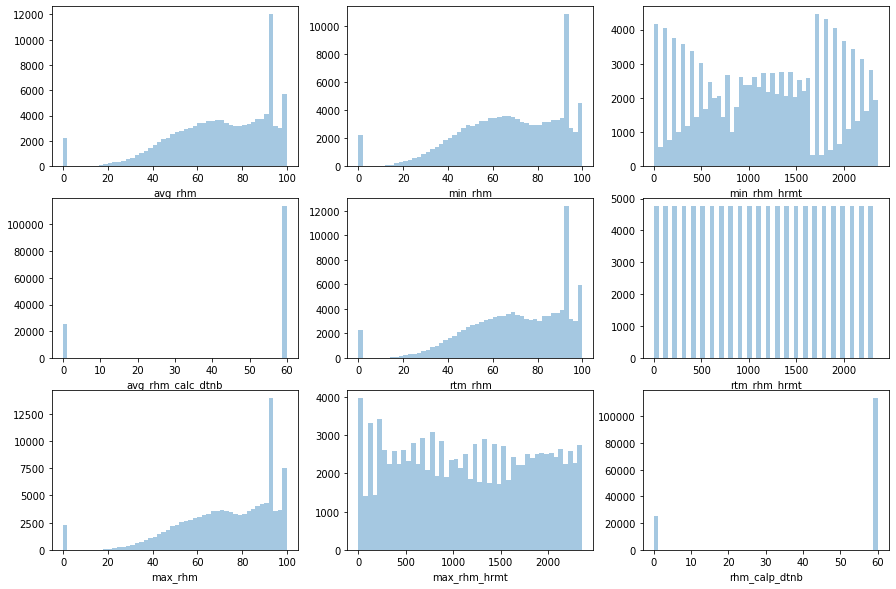

In [155]:
plt.figure(figsize=(15,10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.distplot(rhm.iloc[:,i+2], kde=False)

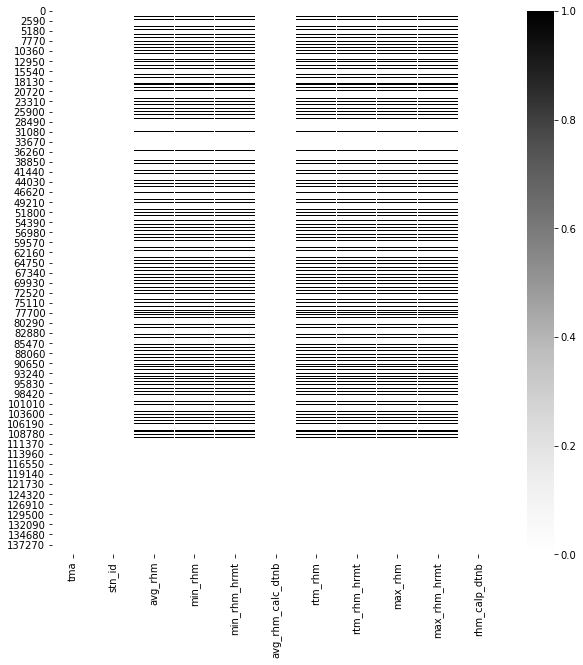

In [158]:
plt.figure(figsize=(10,10))
sns.heatmap(rhm.isnull(), cmap="Greys")

In [159]:
rhm = rhm.fillna(method='ffill')
rhm.isnull().sum()

tma                  0
stn_id               0
avg_rhm              0
min_rhm              0
min_rhm_hrmt         0
avg_rhm_calc_dtnb    0
rtm_rhm              0
rtm_rhm_hrmt         0
max_rhm              0
max_rhm_hrmt         0
rhm_calp_dtnb        0
dtype: int64

In [160]:
rhm.to_csv('../data/weather/aws_rhm.csv', encoding='utf-8', index=False)

# aws_rn

## 데이터 확인

In [161]:
rain = pd.read_csv('../data/weather/raw/aws_rn.csv')
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139820 entries, 0 to 139819
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               139820 non-null  int64  
 1   tma                      139820 non-null  object 
 2   stn_id                   139820 non-null  int64  
 3   sum_rn                   139769 non-null  float64
 4   sum_rn_qcflg             1827 non-null    float64
 5   sum_rn_crob              0 non-null       float64
 6   sum_rn_calp_dtnb         139816 non-null  float64
 7   sum_rn_hrmt              139807 non-null  float64
 8   mi1_rn_en_cnt            139820 non-null  int64  
 9   mi1_rn_en_cnt_qcflg      0 non-null       float64
 10  mi1_rn_en_cnt_crob       0 non-null       float64
 11  mi1_rn_en_cnt_calc_dtnb  139820 non-null  int64  
 12  hr1_rn                   139154 non-null  float64
 13  hr1_rn_qcflg             0 non-null       float64
 14  hr1_

## 컬럼 정리

In [162]:
rain.columns

Index(['Unnamed: 0', 'tma', 'stn_id', 'sum_rn', 'sum_rn_qcflg', 'sum_rn_crob',
       'sum_rn_calp_dtnb', 'sum_rn_hrmt', 'mi1_rn_en_cnt',
       'mi1_rn_en_cnt_qcflg', 'mi1_rn_en_cnt_crob', 'mi1_rn_en_cnt_calc_dtnb',
       'hr1_rn', 'hr1_rn_qcflg', 'hr1_rn_crob', 'hr1_rn_hrmt', 'mi10_max_rn',
       'mi10_max_rn_qcflg', 'mi10_max_rn_crob', 'mi10_max_rn_calp_dtnb',
       'mi10_max_rn_hrmt', 'mi15_max_rn', 'mi15_max_rn_qcflg',
       'mi15_max_rn_crob', 'mi15_max_rn_calc_dtnb', 'mi15_max_rn_hrmt',
       'hr1_max_rn', 'hr1_max_rn_qcflg', 'hr1_max_rn_crob',
       'hr1_max_rn_calc_dtnb', 'hr1_max_rn_hrmt', 'mm0_1_hr1_rn',
       'mm0_1_hr1_rn_qcflg', 'mm0_1_hr1_rn_crob', 'mm0_1_hr1_rn_hrmt',
       'hr1_max_rn_srv_yn', 'hr1_rn_srv_yn', 'mi10_max_rn_srv_yn',
       'mi15_max_rn_srv_yn', 'mi1_rn_en_cnt_srv_yn', 'mm0_1_hr1_rn_srv_yn',
       'orgn_stn_id', 'sum_rn_srv_yn'],
      dtype='object')

In [163]:
import re

In [169]:
drop_cols = rain.columns[rain.columns.str.contains('qcflg|crob|yn')]
drop_cols

Index(['sum_rn_qcflg', 'sum_rn_crob', 'mi1_rn_en_cnt_qcflg',
       'mi1_rn_en_cnt_crob', 'hr1_rn_qcflg', 'hr1_rn_crob',
       'mi10_max_rn_qcflg', 'mi10_max_rn_crob', 'mi15_max_rn_qcflg',
       'mi15_max_rn_crob', 'hr1_max_rn_qcflg', 'hr1_max_rn_crob',
       'mm0_1_hr1_rn_qcflg', 'mm0_1_hr1_rn_crob', 'hr1_max_rn_srv_yn',
       'hr1_rn_srv_yn', 'mi10_max_rn_srv_yn', 'mi15_max_rn_srv_yn',
       'mi1_rn_en_cnt_srv_yn', 'mm0_1_hr1_rn_srv_yn', 'sum_rn_srv_yn'],
      dtype='object')

In [170]:
def drop_cols(data):
    drop_cols = data.columns[data.columns.str.contains('qcflg|crob|yn')]
    data = data.drop(columns=drop_cols)
    return data

In [172]:
rain = drop_cols(rain)
rain.isnull().mean()

Unnamed: 0                 0.000000
tma                        0.000000
stn_id                     0.000000
sum_rn                     0.000365
sum_rn_calp_dtnb           0.000029
sum_rn_hrmt                0.000093
mi1_rn_en_cnt              0.000000
mi1_rn_en_cnt_calc_dtnb    0.000000
hr1_rn                     0.004763
hr1_rn_hrmt                0.000000
mi10_max_rn                0.004713
mi10_max_rn_calp_dtnb      0.000029
mi10_max_rn_hrmt           0.000029
mi15_max_rn                0.004692
mi15_max_rn_calc_dtnb      0.000000
mi15_max_rn_hrmt           0.000086
hr1_max_rn                 0.004463
hr1_max_rn_calc_dtnb       0.000000
hr1_max_rn_hrmt            0.000086
mm0_1_hr1_rn               0.609419
mm0_1_hr1_rn_hrmt          0.000029
orgn_stn_id                1.000000
dtype: float64

In [173]:
rain = rain.drop(columns=['Unnamed: 0', 'mm0_1_hr1_rn', 'mm0_1_hr1_rn_hrmt', 'orgn_stn_id'])
rain.isnull().sum()

tma                          0
stn_id                       0
sum_rn                      51
sum_rn_calp_dtnb             4
sum_rn_hrmt                 13
mi1_rn_en_cnt                0
mi1_rn_en_cnt_calc_dtnb      0
hr1_rn                     666
hr1_rn_hrmt                  0
mi10_max_rn                659
mi10_max_rn_calp_dtnb        4
mi10_max_rn_hrmt             4
mi15_max_rn                656
mi15_max_rn_calc_dtnb        0
mi15_max_rn_hrmt            12
hr1_max_rn                 624
hr1_max_rn_calc_dtnb         0
hr1_max_rn_hrmt             12
dtype: int64

## 데이터타입 정리

In [174]:
rain['tma'] = pd.to_datetime(rain['tma'])
rain.dtypes

tma                        datetime64[ns]
stn_id                              int64
sum_rn                            float64
sum_rn_calp_dtnb                  float64
sum_rn_hrmt                       float64
mi1_rn_en_cnt                       int64
mi1_rn_en_cnt_calc_dtnb             int64
hr1_rn                            float64
hr1_rn_hrmt                         int64
mi10_max_rn                       float64
mi10_max_rn_calp_dtnb             float64
mi10_max_rn_hrmt                  float64
mi15_max_rn                       float64
mi15_max_rn_calc_dtnb               int64
mi15_max_rn_hrmt                  float64
hr1_max_rn                        float64
hr1_max_rn_calc_dtnb                int64
hr1_max_rn_hrmt                   float64
dtype: object

## 정렬

In [175]:
rain = sort_by(rain, ['tma', 'stn_id'])
rain.head()

,tma,stn_id,sum_rn,sum_rn_calp_dtnb,sum_rn_hrmt,mi1_rn_en_cnt,mi1_rn_en_cnt_calc_dtnb,hr1_rn,hr1_rn_hrmt,mi10_max_rn,mi10_max_rn_calp_dtnb,mi10_max_rn_hrmt,mi15_max_rn,mi15_max_rn_calc_dtnb,mi15_max_rn_hrmt,hr1_max_rn,hr1_max_rn_calc_dtnb,hr1_max_rn_hrmt
0,2016-04-01 00:00:00,515,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
1,2016-04-01 00:00:00,616,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
2,2016-04-01 00:00:00,634,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
3,2016-04-01 00:00:00,637,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
4,2016-04-01 01:00:00,515,0.0,60.0,100.0,0,60,0.0,100,0.0,60.0,1.0,0.0,60,1.0,0.0,60,1.0


## 결측치 & 이상치 처리

In [187]:
def multi_distplot(data):
    
    col_n = data.shape[1] - 2
    plt.figure(figsize=(15,20))

    for i in range(col_n):
        plt.subplot(6, 4, i+1)
        sns.distplot(data.iloc[:,i+2], kde=False)

In [188]:
rain.shape[1]

18

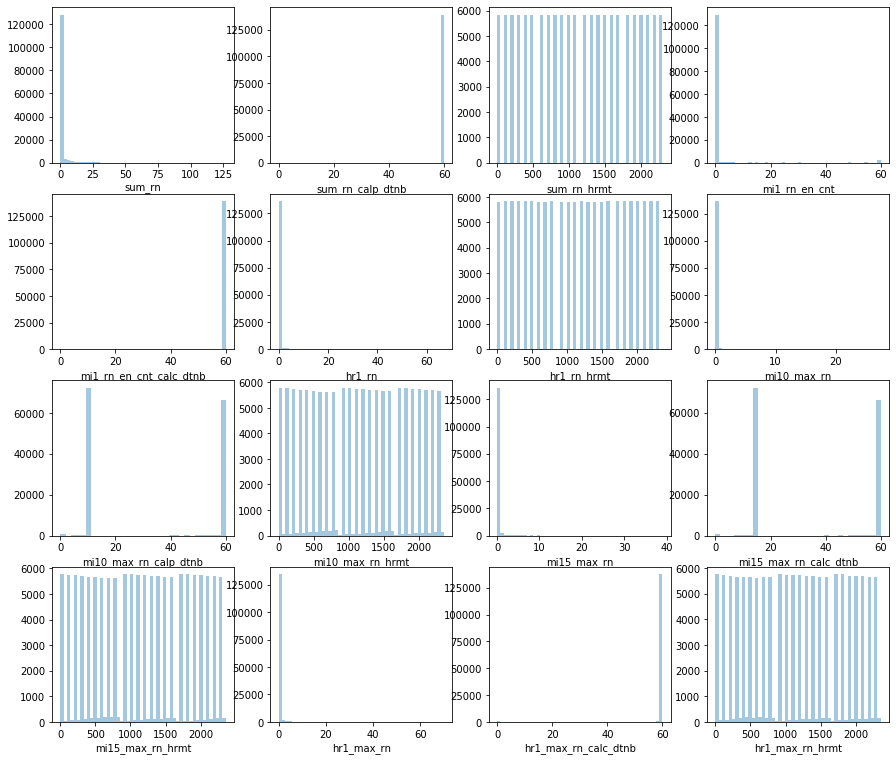

In [189]:
multi_distplot(rain)

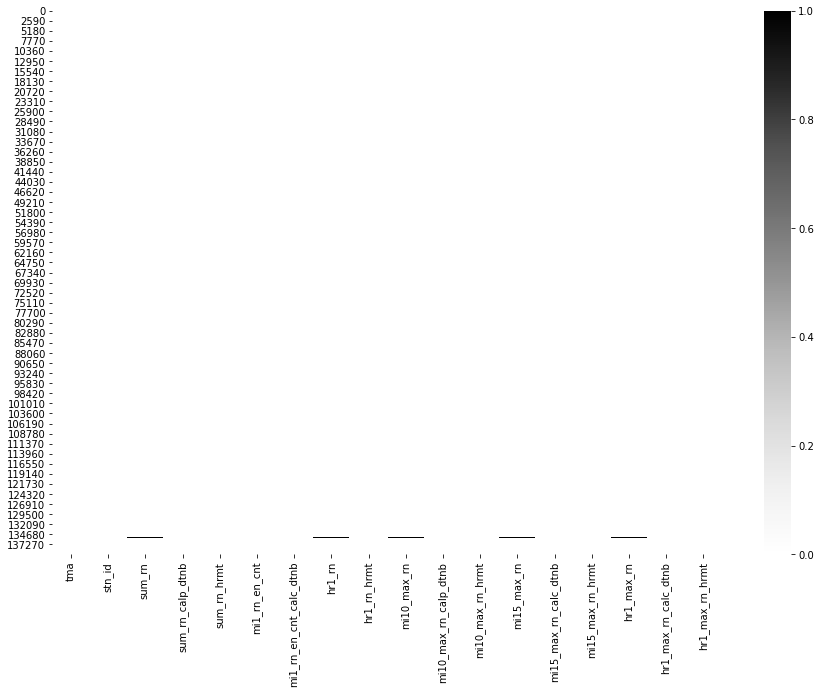

In [191]:
plt.figure(figsize=(15, 10))

sns.heatmap(rain.isnull(), cmap='Greys')

In [192]:
rain = rain.fillna(method='ffill')
rain.isnull().sum()

tma                        0
stn_id                     0
sum_rn                     0
sum_rn_calp_dtnb           0
sum_rn_hrmt                0
mi1_rn_en_cnt              0
mi1_rn_en_cnt_calc_dtnb    0
hr1_rn                     0
hr1_rn_hrmt                0
mi10_max_rn                0
mi10_max_rn_calp_dtnb      0
mi10_max_rn_hrmt           0
mi15_max_rn                0
mi15_max_rn_calc_dtnb      0
mi15_max_rn_hrmt           0
hr1_max_rn                 0
hr1_max_rn_calc_dtnb       0
hr1_max_rn_hrmt            0
dtype: int64

In [194]:
rain.head()

,tma,stn_id,sum_rn,sum_rn_calp_dtnb,sum_rn_hrmt,mi1_rn_en_cnt,mi1_rn_en_cnt_calc_dtnb,hr1_rn,hr1_rn_hrmt,mi10_max_rn,mi10_max_rn_calp_dtnb,mi10_max_rn_hrmt,mi15_max_rn,mi15_max_rn_calc_dtnb,mi15_max_rn_hrmt,hr1_max_rn,hr1_max_rn_calc_dtnb,hr1_max_rn_hrmt
0,2016-04-01 00:00:00,515,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
1,2016-04-01 00:00:00,616,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
2,2016-04-01 00:00:00,634,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
3,2016-04-01 00:00:00,637,0.0,60.0,0.0,0,60,0.0,0,0.0,60.0,2301.0,0.0,60,2301.0,0.0,60,2301.0
4,2016-04-01 01:00:00,515,0.0,60.0,100.0,0,60,0.0,100,0.0,60.0,1.0,0.0,60,1.0,0.0,60,1.0


In [195]:
rain.to_csv('../data/weather/aws_rn.csv', encoding='utf-8', index=False)